<a href="https://colab.research.google.com/github/lnalice/machine_learning/blob/master/movie_k_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import files
# train_movie = files.upload()

In [ ]:
import pandas as pd
df = pd.read_csv('/content/movies_train.csv')

1. k-최근접 이웃 분류 : 스탭 수와 배우 수를 주면 관객수가 높은지 낮은지 분류
2. k-최근접 이웃 회귀 : 스탭 수와 배우 수를 주면 관객수를 예측하는 모델 HERE!

In [ ]:
# df_numpy = df.to_numpy()
# print(df_numpy)
df

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [ ]:
#staff, actor, box_off_num(관객 수) numpy array 만들기
import numpy as np

#일반리스트
staff_list = df.num_staff[:].tolist()
actor_list = df.num_actor[:].tolist()
box_list = df.box_off_num[:].tolist() #타깃 데이터

#nunmpy list
staff_numpy = np.array(staff_list)
actor_numpy = np.array(actor_list)
box_numpy = np.array(box_list) #타깃 데이터

In [ ]:
#/2차원 배열로 만들기
movie_full = np.column_stack((staff_numpy, actor_numpy)) #staff와 actor를 묶어서 2차원 배열로!

# movie_full

In [ ]:
from sklearn.model_selection import train_test_split
#훈련세트 테스트세트 나누기
train_input, test_input, train_target, test_target = train_test_split(
    movie_full, box_numpy,  random_state=600)
#[random_state] 어떻게 지정?



In [ ]:
#scale 처리 <- actor에 배해 staff의 범위가 크므로, 스케일 처리 필요
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

tmp_train_scaled = (train_input - mean) / std
tmp_test_scaled = (test_input - mean) / std

In [ ]:
# 사이킷런의 변환기 -과소적합 예방
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =3, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(tmp_train_scaled)
test_poly = poly.transform(tmp_test_scaled)
print(train_poly.shape)

(450, 9)


In [ ]:
#어떻게 변환되었는가
poly.get_feature_names_out()
# test_poly

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3'], dtype=object)

In [ ]:
#다중 회귀 모델 훈련하기 [그냥 공부]
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(train_poly, train_target)

#훈련 점수 : 0.34428203344854635
# print(lr.score(train_poly, train_target))

#테스트 점수 : 0.26357899630450077
# print(lr.score(test_poly, test_target))

0.3646462892530694
0.2433627096602291


In [ ]:
# 표준화 전처리 : (x-mean )/ std

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

train_scaled = ss.fit_transform(train_poly)
test_scaled = ss.transform(test_poly)

In [ ]:
from sklearn.linear_model import Ridge

# 1. 릿지 회귀 _ alpha 선택없이 학습
ridge = Ridge()
ridge.fit(train_scaled, train_target)

#훈련 점수 : 0.3640279610580628
# print(ridge.score(train_scaled, train_target))
#테스트 점수 : 0.24605177196396066
# print(ridge.score(test_scaled, test_target))

#___________________________________________________________

# 2. 릿지 회귀 _ alpha 선택해보기(alpha는 사실 필수다)

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_score_alpha = []
test_score_alpha = []

for alpha in alpha_list:
  ridge_alpha = Ridge(alpha=alpha)
  ridge_alpha.fit(train_scaled, train_target)
  train_score_alpha.append(ridge_alpha.score(train_scaled, train_target))
  test_score_alpha.append(ridge_alpha.score(test_scaled, test_target))

print(train_score_alpha)  #[0.3646462875770823, 0.3646461237023575, 0.36463158091288883, 0.3640279610580628, 0.3597969159013872, 0.34973062370821417, 0.2922929956349388]
print(test_score_alpha)  #[0.2433670618786603, 0.24340589650637068, 0.24376459993307964, 0.24605177196396066, 0.25698578969726216, 0.29943445923566225, 0.35531107961451147]

[0.36464628923372655, 0.3646462873214108, 0.36464609866375763, 0.36462948295155306, 0.3638726337958642, 0.3521173597642657, 0.26422464048201755]
[0.24336376696353212, 0.24337327901208816, 0.24346803938721706, 0.24438341600165292, 0.2518670216326906, 0.29072470056849553, 0.34209708647206516]


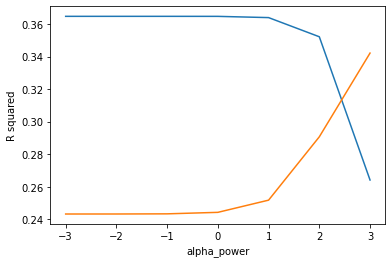

In [ ]:
# alpha를 선택하기 위한 그래프 그리기 
import matplotlib.pyplot as plt

plt.plot(np.log10(alpha_list), train_score_alpha)
plt.plot(np.log10(alpha_list), test_score_alpha)
plt.xlabel('alpha_power')
plt.ylabel('R squared')
plt.show()



# [결론]  alpha는 10^(2.5)


In [ ]:
#alpha 확정으로 최종 훈련 재진행

alpha_fin = 10**(2.5)
# print(alpha_fin)
ridge_fin = Ridge(alpha = alpha_fin)
ridge_fin.fit(train_scaled, train_target)

print(ridge_fin.score(train_scaled, train_target)) #0.33532884692901643
print(ridge_fin.score(test_scaled, test_target)) #0.341857425977547


0.32782390341996415
0.3347642104434154


In [ ]:
import pandas as pd  # doctest: +SKIP
import numpy as np

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html?highlight=boston#sklearn.datasets.load_boston

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]
# target

# data
raw_df



,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [ ]:
sklearn.datasets.load_boston(*, return_X_y=False)

SyntaxError: ignored